# Assignment 4 Question 1
### Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [29]:
data.columns = ['Delivery_Time','Sorting_Time']
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [31]:
# Correlation
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Delivery_Time', ylabel='Count'>

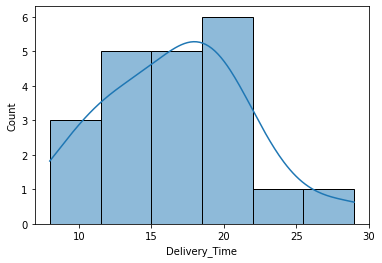

In [32]:
import seaborn as sns
sns.histplot(data['Delivery_Time'], kde=True)

<Axes: xlabel='Sorting_Time', ylabel='Count'>

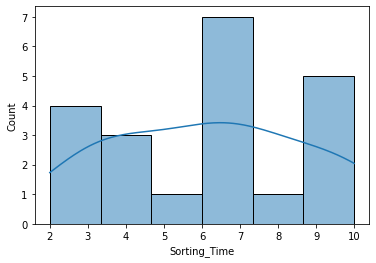

In [33]:
import seaborn as sns
sns.histplot(data['Sorting_Time'], kde=True)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

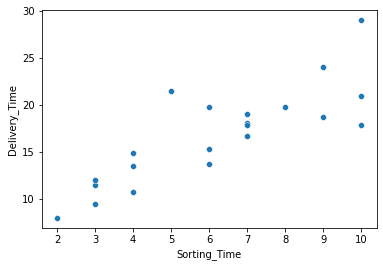

In [34]:
sns.scatterplot(x=data['Sorting_Time'], y=data['Delivery_Time'])

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

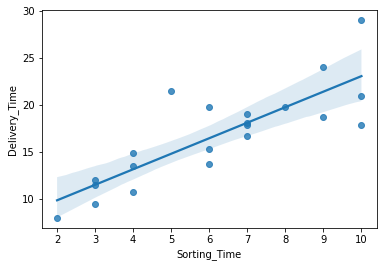

In [35]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)

In [37]:
import statsmodels.formula.api as smf

In [38]:
model = smf.ols(formula='Delivery_Time ~ Sorting_Time', data=data).fit()

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        12:11:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

In [40]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [41]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [42]:
model.rsquared

0.6822714748417231

# Predicted Equation (Delivery_Time = m(Sorting_Time) + c)

### Delivery_Time = (1.649020)*Sorting_Time +(6.582734)

# Prediction for new datapoints

In [43]:
new_data = pd.DataFrame(pd.Series([4,7,10,9]), columns=['Sorting_Time'])
new_data

,Sorting_Time
0,4
1,7
2,10
3,9


In [44]:
model.predict(new_data)

0    13.178814
1    18.125873
2    23.072933
3    21.423913
dtype: float64